In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
from onix.analysis.probe import Probe
from onix.data_tools import get_experiment_data, open_analysis_folder, get_analysis_file_path
from onix.helpers import data_identifier, console_bold, present_float

In [10]:
name = "Ramsey EO"
analysis_number = None
identifier = None

In [3]:
def add_label(ax, x=0.02, y=1.1):
    ax.text(x, y, identifier, transform=ax.transAxes)

In [4]:
def data_to_probe(data_number):
    data, headers = get_experiment_data(data_number)
    repeats = ["initial", "chasm", "antihole", "flop"]
    probe_repeats = headers["params"]["probe_repeats"]
    repeats = dict([(kk, probe_repeats) for kk in repeats])
    p = Probe(data["photodiode_times"], data["photodiode_voltages"], repeats)
    p.transmission_groups["flop_no_bg"] = p.transmission_groups["flop"] - p.transmission_groups["antihole"]

    pre_probe_delay = headers["params"]["ttl_probe_offset_time"].to("s").magnitude
    on_time = headers["params"]["probe_on_time"].to("s").magnitude
    off_time = headers["params"]["probe_off_time"].to("s").magnitude
    rise_delay = 5e-6
    fall_delay = 3e-6
    probe_detunings = headers["params"]["probe_detunings"].to("MHz").magnitude
    p.set_probe_times(pre_probe_delay, on_time, off_time, rise_delay, fall_delay, probe_detunings)
    return p

In [63]:
data_numbers = [528, 529, 530, 531]
probes = [data_to_probe(kk) for kk in data_numbers]
identifier = "data " + data_identifier(data_numbers)# + ", analysis " + data_identifier([analysis_number])

In [64]:
index = -1
p = probes[index]
data_number = data_numbers[index]

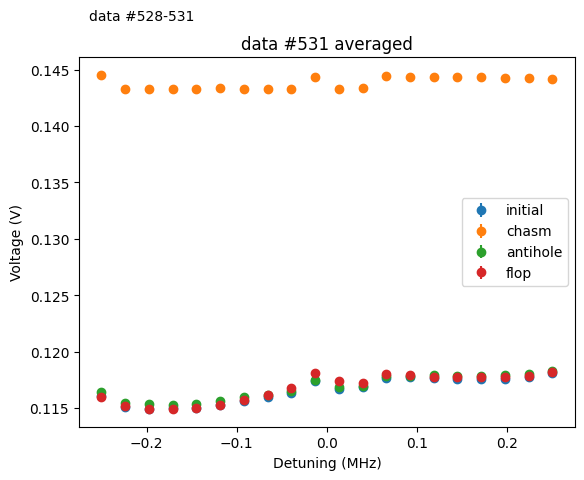

In [65]:
fig, ax = plt.subplots()
add_label(ax)
ax.errorbar(p.probes, p.averages("initial"), p.errors("initial"), label="initial", ls="none", marker="o")
ax.errorbar(p.probes, p.averages("chasm"), p.errors("chasm"), label="chasm", ls="none", marker="o")
ax.errorbar(p.probes, p.averages("antihole"), p.errors("antihole"), label="antihole", ls="none", marker="o")
ax.errorbar(p.probes, p.averages("flop"), p.errors("flop"), label="flop", ls="none", marker="o")
ax.legend()
ax.set_xlabel("Detuning (MHz)")
ax.set_ylabel("Voltage (V)")
ax.set_title(f"data #{data_number} averaged")
plt.show()

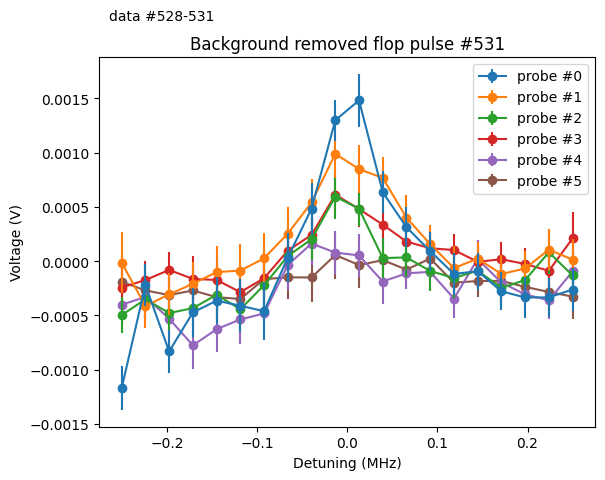

In [66]:
fig, ax = plt.subplots()
add_label(ax)
zorder = 100
for kk in range(len(p.averages("flop_no_bg", mode="probe_repeats"))):
    signal = p.averages("flop_no_bg", mode="probe_repeats")[kk]
    error = p.errors("flop_no_bg", mode="probe_repeats")[kk]
    ax.errorbar(p.probes, signal, error, label=f"probe #{kk}", marker="o", zorder=zorder-kk)
ax.legend()
ax.set_title(f"Background removed flop pulse #{data_number}")
ax.set_xlabel("Detuning (MHz)")
ax.set_ylabel("Voltage (V)")
plt.show()

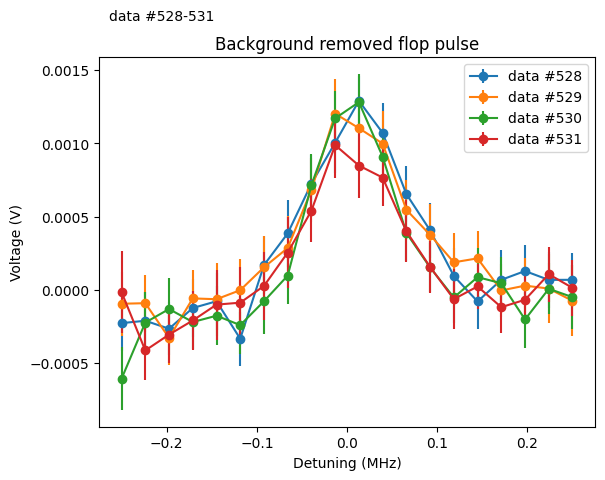

In [67]:
fig, ax = plt.subplots()
add_label(ax)
for kk, number in enumerate(data_numbers):
    probe = probes[kk]
    index = 1
    signal = probe.averages("flop_no_bg", mode="probe_repeats")[index]
    error = probe.errors("flop_no_bg", mode="probe_repeats")[index]
    ax.errorbar(probe.probes, signal, error, label=f"data #{number}", marker="o")
ax.legend()
ax.set_title("Background removed flop pulse")
ax.set_xlabel("Detuning (MHz)")
ax.set_ylabel("Voltage (V)")
plt.show()